# Stochastic Gradient Descent
Use Keras and Tensorflow to train your first neural network.




This section summarizes how neural networks learn through training, using **loss functions** and **optimizers**.

---

## 📌 Key Concepts

### 🎯 Training a Neural Network
- **Goal**: Adjust weights so the model can predict targets from input features.
- **Example**: Predict cereal calories from sugar, fiber, and protein.

### 🧩 Components Needed
- 📊 **Training Data**: Inputs (features) and expected outputs (targets).
- 📉 **Loss Function**: Measures how good the predictions are.
- 🔧 **Optimizer**: Adjusts weights to reduce the loss.

---

## ⚖️ Loss Functions

- **Purpose**: Quantifies the difference between predicted and actual values.

### 🔍 Common Loss for Regression:
- 📏 **Mean Absolute Error (MAE)**: `abs(y_true - y_pred)`
- 🧮 **Mean Squared Error (MSE)**
- 📐 **Huber Loss**

> ✅ **Loss Minimization**: Lower loss = better performance.

---

## 🚀 Optimizers

- **Purpose**: Find the best weights to minimize loss.
- **Technique Used**: **Stochastic Gradient Descent (SGD)**

### 🔄 How SGD Works:
1. 🧪 Sample a **minibatch** from training data.
2. 🧠 Compute **predictions**.
3. 📉 Measure **loss**.
4. 🛠 Adjust **weights** to reduce loss.

- 🔁 **Epoch**: One full pass through the training data.
- 📦 **Minibatch**: A small subset of training data used per iteration.

---

### ⚙️ Important Parameters
- 📏 **Learning Rate**: Size of each weight update.
- 📦 **Batch Size**: Number of samples per minibatch.

---

### 💡 Optimizer Recommendation

Use **Adam**: an adaptive optimizer with built-in learning rate adjustment.

```python
model.compile(
    optimizer="adam",
    loss="mae",
)
```
### ❓ Why "Stochastic Gradient Descent"?
🧭 Gradient: Tells how to adjust weights to reduce loss.

📉 Descent: We move in the direction of lower loss.

🎲 Stochastic: Because we use random minibatches.

💡 Summary:
SGD is an iterative process to minimize loss by adjusting model weights using random batches of training data.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('dl-course-data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [4]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


Defining the network we'll use for this task!

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 1) Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's `compile` method, add the Adam optimizer and MAE loss.

In [6]:
model.compile(
    optimizer='adam',
    loss='mae'
)

# 2) Train Model

Once we've defined the model and compiled it with a loss and optimizer we're ready for training. Let's Train the network for 200 epochs with a batch size of 128. The input data is `X` with target `y`.

In [7]:
history =  model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2880
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5234 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8673 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4257 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2963 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2201 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1751 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1334 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1163 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0967 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0888 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 
Epoch 16/200
9/9 ━━━

The last step is to look at the loss curves and evaluate the training.

<Axes: >

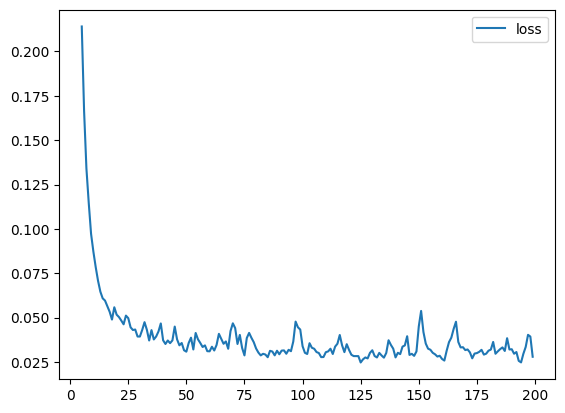

In [8]:


history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot()

# 3) Evaluate Training

If you trained the model longer, would you expect the loss to decrease further?

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

With the learning rate and the batch size, you have some control over:

- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.